<a class="anchor" id="0.1"></a>
# Visualization for Exploratory Data Analysis
- [A. Univariate analysis](#1)
    - [A-1. Quantitative Variables](#2)
    - [A-2. Categorical Variables](#3)
    
    
- [B. Bivariate Analysis](#4)
   - [B-1. One quantitative variable and one categorical variable](#4)
   - [B-2. Two quantitative variables](#5)
   - [B-3. Two categorical variables](#6)
   
   
- [C. Multivariate analysis](#7)

In [2]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv("streeteasy.csv")
df.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         5000 non-null   int64  
 1   building_id       5000 non-null   int64  
 2   rent              5000 non-null   int64  
 3   bedrooms          5000 non-null   float64
 4   bathrooms         5000 non-null   int64  
 5   size_sqft         5000 non-null   int64  
 6   min_to_subway     5000 non-null   int64  
 7   floor             5000 non-null   float64
 8   building_age_yrs  5000 non-null   int64  
 9   no_fee            5000 non-null   int64  
 10  has_roofdeck      5000 non-null   int64  
 11  has_washer_dryer  5000 non-null   int64  
 12  has_doorman       5000 non-null   int64  
 13  has_elevator      5000 non-null   int64  
 14  has_dishwasher    5000 non-null   int64  
 15  has_patio         5000 non-null   int64  
 16  has_gym           5000 non-null   int64  


## A. Univariate analysis <a class="anchor" id="1"></a>
[Table of Contents](#0.1)

Univariate analysis focuses on a single variable at a time. Univariate data visualizations can help us answer questions like:

- What is the typical price of a rental in New York City?
- What proportion of NYC rentals have a gym?

Depending on the type of variable (quantitative or categorical) we want to visualize, we need to use slightly different visualizations.

### A-1. Quantitative Variables <a class="anchor" id="2"></a>
[Table of Contents](#0.1)

Box plots (or violin plots) and histograms are common choices for visually summarizing a quantitative variable. 

These plots are useful because they simultaneously communicate information about minimum and maximum values, central location, and spread. Histograms can additionally illuminate patterns that can impact an analysis (eg., skew or multimodality).

#### Exercise-1
For example, suppose we are interested in learning more about the price of apartments in NYC. A good starting place is to plot a box plot of the `rent` variable.

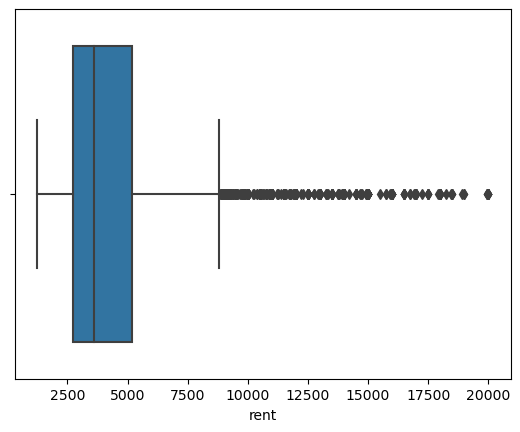

In [9]:
sns.boxplot(df["rent"]);

**We can see that most rental prices fall within a range of $2500-$5000; however, there are many outliers, particularly on the high end.**

#### Exercise 2
For more detail, we can also plot a histogram of the rent variable.

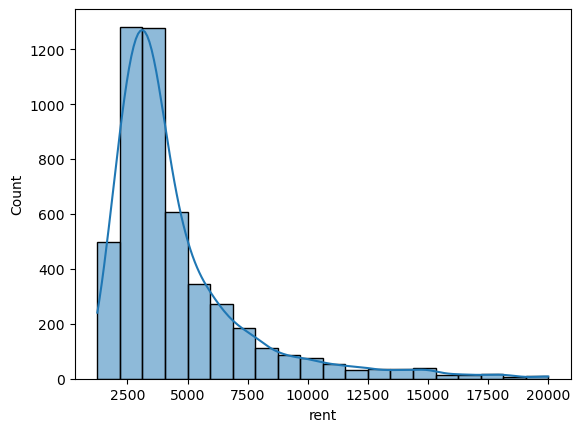

In [14]:
sns.histplot(df["rent"], bins = 20, kde = True);

### A-2. Categorical Variables <a class="anchor" id="3"></a>
[Table of Contents](#0.1)

For categorical variables, we can use a bar plot (instead of a histogram) to quickly visualize the frequency (or proportion) of values in each category.

#### Exercise 1

For example, suppose we want to know how many apartments are available in each borough.

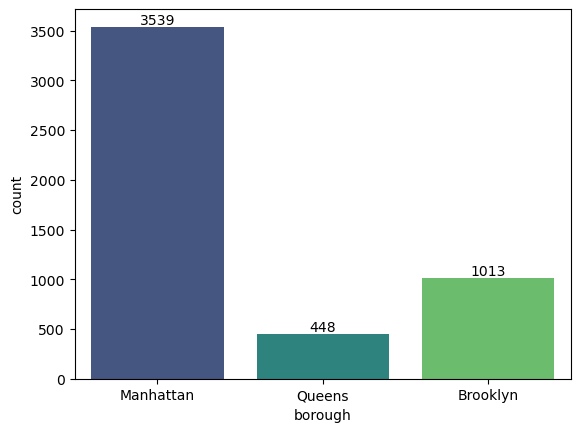

In [44]:
ax = sns.countplot(data = df, x = "borough", palette = "viridis");

for i in ax.containers:
    ax.bar_label(i)

#### Exercise 2
Alternatively, we could use a pie chart to communicate the same information.

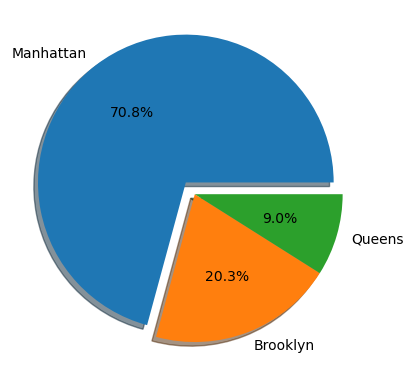

In [51]:
plt.pie(df["borough"].value_counts(), labels = df["borough"].value_counts().index, 
        autopct = "%.1f%%", explode = [0.1, 0, 0], shadow = True)
plt.show()

**In general, many data analysts avoid pie charts because people are better at visually comparing areas of rectangles than wedges of a pie.**

**For a variable with a small number of categories (i.e., fewer than three), a pie chart is a reasonable choice; however, for more complex data, a bar chart is usually preferable.**

## B. Bivariate Analysis <a class="anchor" id="4"></a>
[Table of Contents](#0.1)

In many cases, a data analyst is interested in the relationship between two variables in a dataset. For example:

- Do apartments in different boroughs tend to cost different amounts?
- What is the relationship between the area of an apartment and how much it costs?

Depending on the types of variables we are interested in, we need to rely on different kinds of visualizations.

### B-1. One quantitative variable and one categorical variable <a class="anchor" id="5"></a>
[Table of Contents](#0.1)

Two good options for investigating the relationship between a quantitative variable and a categorical variable are side-by-side box plots and overlapping histograms.

#### Exercise 1
For example, suppose we want to understand whether apartments in different boroughs cost different amounts. We could address this question by plotting side by side box plots of rent by borough

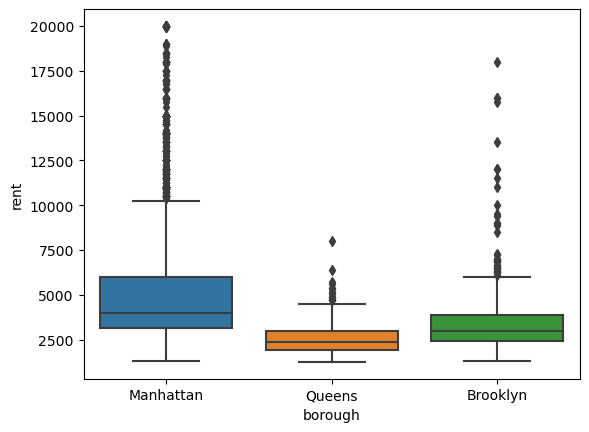

In [30]:
sns.boxplot(data = df, x = "borough", y = "rent");

**This plot indicates that rental prices in Manhattan tend to be higher and have more variation than rental prices in other boroughs.**

#### Exercise 2
We could also investigate the same question in more detail by looking at overlapping histograms of rental prices by borough:

In [34]:
df["borough"].unique()

array(['Manhattan', 'Queens', 'Brooklyn'], dtype=object)

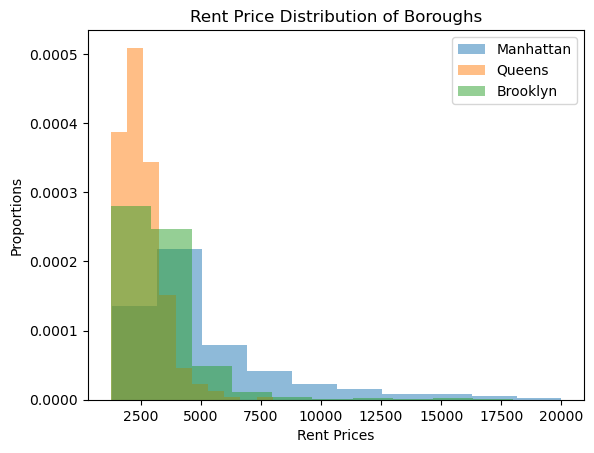

In [43]:
plt.hist(df.loc[df["borough"] == "Manhattan", "rent"], label = "Manhattan", density = True, alpha = 0.5)
plt.hist(df.loc[df["borough"] == "Queens", "rent"], label = "Queens", density = True, alpha = 0.5)
plt.hist(df.loc[df["borough"] == "Brooklyn", "rent"], label = "Brooklyn", density = True, alpha = 0.5)

plt.title("Rent Price Distribution of Boroughs")
plt.xlabel("Rent Prices")
plt.ylabel("Proportions")

plt.legend()
plt.show()

**Using this visualization, we can see the long right-handed tail in rental prices, especially for Manhattan, and comparatively low prices in Queens.**

### B-2. Two quantitative variables <a class="anchor" id="6"></a>
[Table of Contents](#0.1)

A scatter plot is a great option for investigating the relationship between two quantitative variables. 

#### Exercise 1
For example, if we want to explore the relationship between `rent` and `size_sqft`, we could create a scatter plot of these two variables.

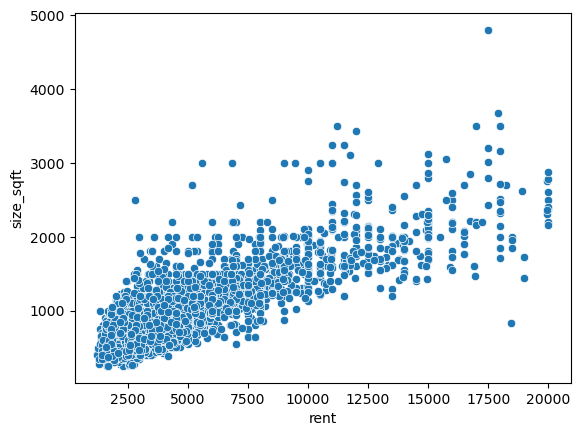

In [53]:
sns.scatterplot(data = df, x = "rent", y = "size_sqft");

**The plot indicates that there is a strong positive linear relationship between the cost to rent a property and its square footage. Larger properties tend to cost more money.**

### B-3. Two categorical variables <a class="anchor" id="7"></a>
[Table of Contents](#0.1)

Side by side (or stacked) bar plots are useful for visualizing the relationship between two categorical variables.

#### Exercise 1
For example, suppose we want to know whether rentals that have an elevator are more likely to have a gym.

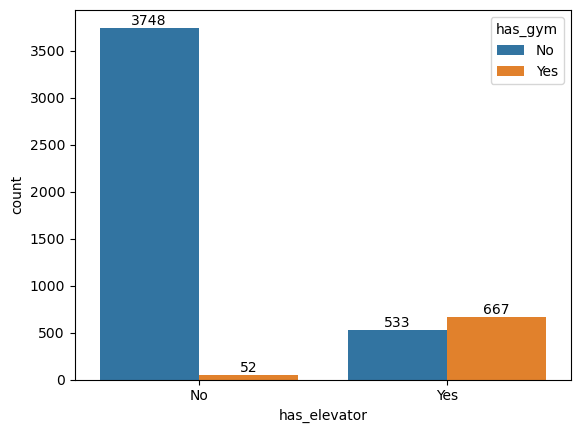

In [75]:
ax = sns.countplot(data = df, x = "has_elevator", hue = "has_gym")

for i in ax.containers:
    ax.bar_label(i)
    
plt.xticks(ticks = [0, 1], labels = ["No", "Yes"])
plt.legend(["No", "Yes"], title="has_gym");

**This plot tells us that buildings with elevators are approximately equally likely to have a gym or not have a gym; meanwhile, apartments without elevators are very unlikely to have a gym.**

## C. Multivariate analysis <a class="anchor" id="8"></a>
[Table of Contents](#0.1)

Sometimes, a data analyst is interested in simultaneously exploring the relationship between three or more variables in a single visualization.

Many of the visualization methods presented up to this point can include additional variables by using visual cues such as colors, shapes, and patterns. 

#### Exercise 1
For example, we can investigate the relationship between rental price, square footage, and borough by using color to introduce our third variable.

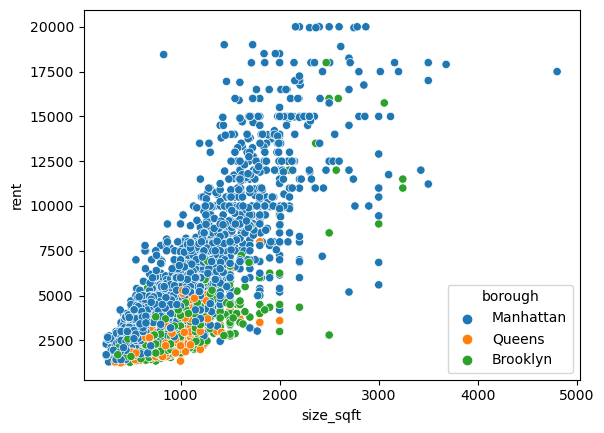

In [81]:
sns.scatterplot(data = df, x = "size_sqft", y = "rent", hue = "borough");

**This plot shows many things at once: the positive linear relationship between price and area, the fact that Manhattan apartments tend to be larger than the other boroughs (because there are more blue points on the right-hand side of the plot compared to the other colors), and that Manhattan apartments tend to cost more money (because the blue points are mostly on top of the green and orange points).**

**Even though it’s possible to add even more information to this plot (for example, we could use triangles and squares to indicate whether or not an apartment has a gym), it’s not always a good idea to overload a single visualization.**

#### Exercise 2
Another common data visualization for multivariate analysis is a heat map of a correlation matrix for all quantitative variables.

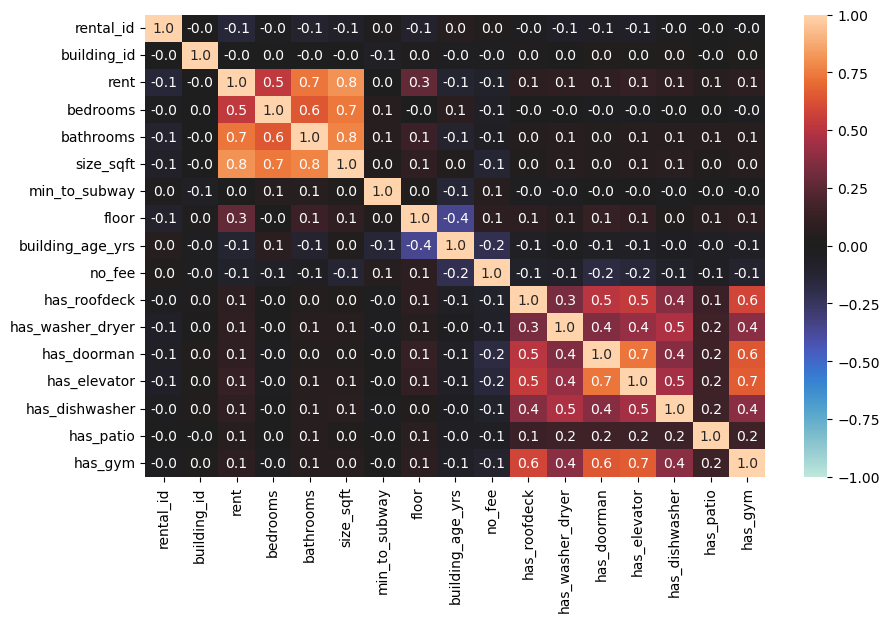

In [91]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot = True, robust=True, fmt = ".1f", vmin = -1, center = 0);

**This heat map shows is that the rental price, number of bedrooms, number of bathrooms, and size of an apartment are all highly positively correlated (higher values of one are associated with higher values of the others).**

**Meanwhile, building age is weakly negatively correlated with rent, bathrooms, minutes to the subway, and floor (higher values of building age are associated with lower values of these other variables).**

---

------